In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-cell-phones-reviews/20191226-items.csv
/kaggle/input/amazon-cell-phones-reviews/20191226-reviews.csv


# Amazon Products - Case Study ( with NLP and Data Visualization)

# Basic text data pre-processing

In [2]:
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math


In [3]:
# Importing dataset
df=pd.read_csv('/kaggle/input/amazon-cell-phones-reviews/20191226-reviews.csv') 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67986 entries, 0 to 67985
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   asin          67986 non-null  object 
 1   name          67984 non-null  object 
 2   rating        67986 non-null  int64  
 3   date          67986 non-null  object 
 4   verified      67986 non-null  bool   
 5   title         67972 non-null  object 
 6   body          67965 non-null  object 
 7   helpfulVotes  27215 non-null  float64
dtypes: bool(1), float64(1), int64(1), object(5)
memory usage: 3.7+ MB


In [4]:
df=df[['name','body','verified','helpfulVotes']]
print("Shape of data=>",df.shape)
df.head()

Shape of data=> (67986, 4)


,name,body,verified,helpfulVotes
0,Janet,I had the Samsung A600 for awhile which is abs...,False,1.0
1,Luke Wyatt,Due to a software issue between Nokia and Spri...,False,17.0
2,Brooke,"This is a great, reliable phone. I also purcha...",False,5.0
3,amy m. teague,"I love the phone and all, because I really did...",False,1.0
4,tristazbimmer,The phone has been great for every purpose it ...,False,1.0


In [5]:
df.dropna(inplace=True)
df.isnull().sum()

name            0
body            0
verified        0
helpfulVotes    0
dtype: int64

In [6]:
df=df.groupby('name').filter(lambda x:len(x)>400).reset_index(drop=True)
print('Number of products=>',len(df['name'].unique()))

Number of products=> 1


In [7]:
df['verified']=df['verified'].astype(int)
df['helpfulVotes']=df['helpfulVotes'].astype(int)

# Cleaning Text Data

In [8]:
df['name'].unique()

array(['Amazon Customer'], dtype=object)

In [9]:
df['name']=df['name'].apply(lambda x: x.split(',,,')[0])

In [10]:
for index,text in enumerate(df['body'][35:40]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 I first bought the Samsung Galaxy S3, while my wife got an Iphone 5. I found the size of the Samsung unwieldy, and the battery life atrocious. I couldn't get through the day without plugging it in, and I'm not a heavy telephone user. I also couldn't work it well with just a thumb while driving...the Sammy is a 2-handed phone. Finally, the Samsung had trouble connecting to wifi in some areas where the Iphone 5 had no problem. For these reasons, I returned it. The RAZR M is just the opposite. Yesterday, I unplugged the phone at 9am. I had Bluetooth and Wifi on all day. I live in a bad service area, with 2 bars of 3G or 1 bar of 4G, and it seems to oscillate between the two, and this is exactly what is supposed to be a major battery drain. I made a couple calls over BT and downloaded and listened to several podcasts via wifi. Also installed a couple apps. When I went to plug it in at 9pm, the battery was still at 75%. That is simply amazing. In addition, the phone is much easie

In [11]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

In [12]:
# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
df['body']=df['body'].apply(lambda x:expand_contractions(x))

In [13]:
df['cleaned']=df['body'].apply(lambda x: x.lower())

In [14]:
df['cleaned']=df['cleaned'].apply(lambda x: re.sub('\w*\d\w*','', x))

In [15]:
df['cleaned']=df['cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

In [16]:
df['cleaned']=df['cleaned'].apply(lambda x: re.sub(' +',' ',x))

In [17]:
for index,text in enumerate(df['cleaned'][35:40]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 i first bought the samsung galaxy while my wife got an iphone i found the size of the samsung unwieldy and the battery life atrocious i could not get through the day without plugging it in and i am not a heavy telephone user i also could not work it well with just a thumb while drivingthe sammy is a handed phone finally the samsung had trouble connecting to wifi in some areas where the iphone had no problem for these reasons i returned it the razr m is just the opposite yesterday i unplugged the phone at i had bluetooth and wifi on all day i live in a bad service area with bars of or bar of and it seems to oscillate between the two and this is exactly what is supposed to be a major battery drain i made a couple calls over bt and downloaded and listened to several podcasts via wifi also installed a couple apps when i went to plug it in at the battery was still at that is simply amazing in addition the phone is much easier to carry in a pocket and hold in the hand than the sam

In [18]:
# Importing spacy
import spacy

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
df['lemmatized']=df['cleaned'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))


In [19]:
df_grouped=df[['name','lemmatized']].groupby(by='name').agg(lambda x:' '.join(x))
df_grouped.head()

,lemmatized
name,
Amazon Customer,ok m school need text messaging ve phone month...


In [20]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer 
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df_grouped['lemmatized'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=df_grouped.index
df_dtm.head(3)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,abandon,abe,ability,able,abnormality,abominable,abother,abroad,absence,...,zenfone,zero,zerolemon,ziltch,zip,zone,zoom,zte,última,索尼大法好
name,,,,,,,,,,,,,,,,,,,,,
Amazon Customer,1,1,1,19,119,1,7,1,3,1,...,1,21,1,1,1,5,8,2,2,1


# Exploratory Data Analysis

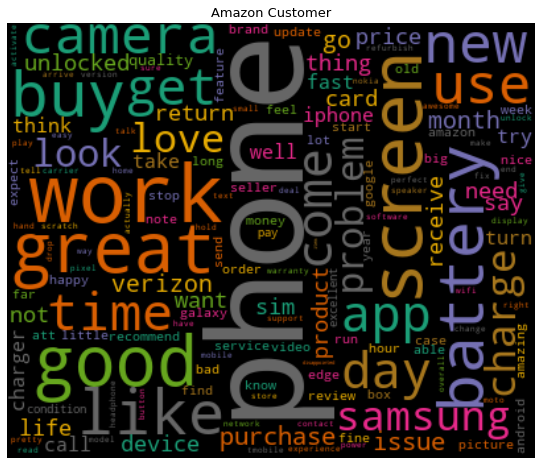

In [21]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap

# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()
  
# Transposing document term matrix
df_dtm=df_dtm.transpose()

# Plotting word cloud for each product
for index,product in enumerate(df_dtm.columns):
  generate_wordcloud(df_dtm[product].sort_values(ascending=False),product)